In [7]:
import numpy as np
import pandas as pd
import math
import time
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [25]:
points = pd.read_csv("../data/eleicoes_2006_a_2010.csv")
points.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b45bbcf50>,
      dtype=object)

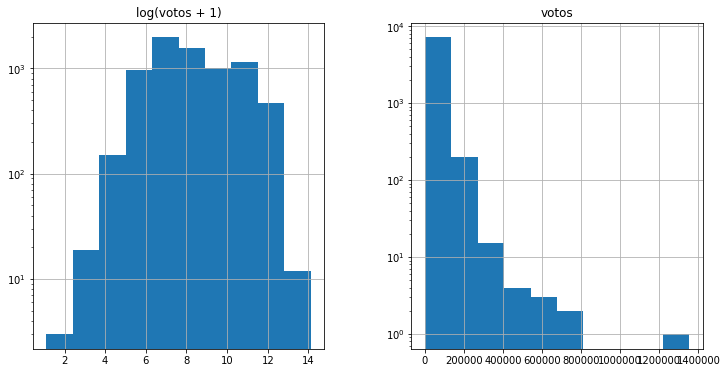

In [5]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
votos = pd.DataFrame({"log(votos + 1)":np.log1p(points["votos"]), 
                              "votos":points["votos"]})
votos.hist(log=True)                

In [26]:
#log transform skewed numeric features:
points = points.loc[:,'nome':'votos']
numeric_feats = points.dtypes[points.dtypes != "object"].index

skewed_feats = points[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print skewed_feats
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

points[skewed_feats] = np.log1p(points[skewed_feats])

quantidade_doacoes                       39.974077
quantidade_doadores                      37.534080
total_receita                             4.599025
media_receita                            12.103300
recursos_de_outros_candidatos/comites    13.888412
recursos_de_pessoas_fisicas               6.798076
recursos_de_pessoas_juridicas             3.429655
recursos_proprios                        15.777769
quantidade_despesas                       8.544328
quantidade_fornecedores                   8.423145
total_despesa                             4.534031
media_despesa                            66.365637
votos                                     6.668206
dtype: float64


/home/diogo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.


In [20]:
points = pd.get_dummies(points)

#filling NA's with the mean of the column:
points = points.fillna(points.mean())